In [1]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales_data = pd.read_excel('Sales Data.xlsx')
sales_data.head()

Model Local Sold At Month            Payment Plan Name  Sales
0  M-KOPA Copia TV             2023-05   MK Copia TV 32" Upgrade v9      2
1  M-KOPA Copia TV             2023-05  MK Copia TV 32" Upgrade v10     18
2  M-KOPA Copia TV             2023-05   MK Copia TV 32" Upgrade v6      1
3  M-KOPA Copia TV             2023-04   MK Copia TV 32" Upgrade v2      1
4  M-KOPA Copia TV             2023-04  MK Copia TV 32" Upgrade v10     35

In [3]:
sales_data.shape

(194, 4)

# Questions

You are required to create a dashboard that includes the following:
<br>
• A chart that shows the sales trend of a selected Model over time.
<br>
• A chart that shows the monthly revenue trend of a selected Masterbrand.
<br>
• A chart that shows the total revenue generated by each Product Sub Category.
<br>
• A chart that shows the daily top-up trend of each Product Type.
<br>
• A table that shows the Payment Plan with the highest sales in a particular month.

In this section of the technical exercise, we are going to need some columns from the Payment Plan Table.

# Data Cleaning

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Model                193 non-null    object
 1   Local Sold At Month  193 non-null    object
 2   Payment Plan Name    193 non-null    object
 3   Sales                194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


We have one more extra row in the Sales Column. Let's deal with that

In [5]:
sales_data['Sales'].describe()

count      194.000000
mean       278.329897
std       1950.051968
min          1.000000
25%          2.000000
50%         12.000000
75%        142.000000
max      26998.000000
Name: Sales, dtype: float64

In [6]:
sales_data.isnull().sum()

Model                  1
Local Sold At Month    1
Payment Plan Name      1
Sales                  0
dtype: int64

<b>Inspecting Model Column

In [7]:
sales_data['Model'].value_counts()

Model
M-KOPA 6000           46
M-KOPA 600            37
M-KOPA Copia TV       33
M-KOPA 6              21
M-KOPA +6000          17
M-KOPA +600           15
M-KOPA 60000          10
M-KOPA 6000 Grid       8
M-KOPA Bio-Lite TV     2
M-KOPA +500            2
M-KOPA 600 Zuku        1
M-KOPA +400 Zuku       1
Name: count, dtype: int64

In [8]:
#Null values in the Model column
sales_data[sales_data['Model'].isnull()]

Model Local Sold At Month Payment Plan Name  Sales
193   NaN                 NaN               NaN  26998

<b>Inspecting Sales Column

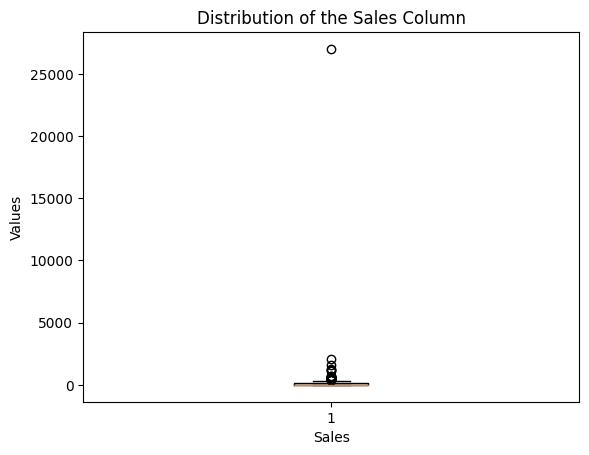

In [9]:
#Distribution of the Sales column using a box plot to check for outliers
plt.boxplot(sales_data['Sales'])
plt.xlabel('Sales')
plt.ylabel('Values')
plt.title('Distribution of the Sales Column')
plt.show()

We have an outlier in the "Sales" column attached to the null values in the other columns. Let's get rid of the Null values

In [10]:
sales_data.dropna(inplace = True)
sales_data.isnull().sum()

Model                  0
Local Sold At Month    0
Payment Plan Name      0
Sales                  0
dtype: int64

# Merging the Tables

In [11]:
payment_plan = pd.read_excel('Clean Payment Plan.xlsx')
payment_plan.shape

(488, 20)

In [12]:
# Merging the payment_plan and sales table
sales_data_final = pd.merge(payment_plan, sales_data, on=['Payment Plan Name','Model'])
sales_data_final.shape

(154, 22)

In [13]:
sales_data_final.isnull().sum()

Created At Date         0
Payment Plan Name       0
Product Sub Category    0
Product Type            0
Currency Name           0
Product Price           0
Deposit                 0
Daily Top Up            0
Loan Duration           0
Total Top Ups           0
Brand                   0
Masterbrand             0
Model                   0
Plan Type               0
Product Category        0
Variant                 0
Mart Payment Plan ID    0
Payment Plan Status     0
Month                   0
Year                    0
Local Sold At Month     0
Sales                   0
dtype: int64

In [14]:
sales_data_final.head(1)

Created At Date    Payment Plan Name Product Sub Category Product Type  \
0      2018-11-30  M-KOPA 600 (24") v2           M-KOPA 600     Solar TV   

  Currency Name  Product Price  Deposit  Daily Top Up  Loan Duration  \
0           KES          64999     5999         100.0            590   

   Total Top Ups  ...       Model    Plan Type Product Category Variant  \
0          59000  ...  M-KOPA 600  Acquisition            MK TV  24" TV   

  Mart Payment Plan ID Payment Plan Status  Month  Year Local Sold At Month  \
0                  969              Closed    Nov  2018             2022-08   

   Sales  
0     48  

[1 rows x 22 columns]

<b>Selecting Columnss to Use to answer relevant questions</b>

In [15]:
sales_data_final.columns

Index(['Created At Date', 'Payment Plan Name', 'Product Sub Category',
       'Product Type', 'Currency Name', 'Product Price', 'Deposit',
       'Daily Top Up', 'Loan Duration', 'Total Top Ups', 'Brand',
       'Masterbrand', 'Model', 'Plan Type', 'Product Category', 'Variant',
       'Mart Payment Plan ID', 'Payment Plan Status', 'Month', 'Year',
       'Local Sold At Month', 'Sales'],
      dtype='object')

In [16]:
sales_data_final = sales_data_final[['Payment Plan Name','Mart Payment Plan ID','Local Sold At Month','Product Sub Category','Model','Masterbrand',
'Product Type','Product Price', 'Deposit','Daily Top Up', 'Loan Duration', 'Total Top Ups','Sales']]
sales_data_final.head()

Payment Plan Name  Mart Payment Plan ID Local Sold At Month  \
0      M-KOPA 600 (24") v2                   969             2022-08   
1      M-KOPA 600 (24") v2                   969             2022-07   
2      M-KOPA 600 (24") v2                   969             2022-06   
3  MK 6000 32" TV v2 Staff                  1667             2023-03   
4  MK 6000 32" TV v2 Staff                  1667             2023-02   

  Product Sub Category        Model Masterbrand Product Type  Product Price  \
0           M-KOPA 600   M-KOPA 600       Solar     Solar TV          64999   
1           M-KOPA 600   M-KOPA 600       Solar     Solar TV          64999   
2           M-KOPA 600   M-KOPA 600       Solar     Solar TV          64999   
3          M-KOPA 6000  M-KOPA 6000       Solar     Solar TV          43999   
4          M-KOPA 6000  M-KOPA 6000       Solar     Solar TV          43999   

   Deposit  Daily Top Up  Loan Duration  Total Top Ups  Sales  
0     5999         100.0            590          59000     48  
1     5999         100.0            590          59000     36  
2     5999         100.0            590          59000      5  
3     3999         100.0            400          40000      3  
4     3999         100.0            400          40000      8

In [17]:
sales_data_final.duplicated().sum()

0

<b>Creating new Revenue Column</b>

In [23]:
# Calculate the revenue by multiplying 'Total Top Ups' and 'Product Price'
sales_data_final['Revenue'] = sales_data_final['Daily Top Up'] * sales_data_final['Sales']
sales_data_final

Payment Plan Name  Mart Payment Plan ID Local Sold At Month  \
0           M-KOPA 600 (24") v2                   969             2022-08   
1           M-KOPA 600 (24") v2                   969             2022-07   
2           M-KOPA 600 (24") v2                   969             2022-06   
3       MK 6000 32" TV v2 Staff                  1667             2023-03   
4       MK 6000 32" TV v2 Staff                  1667             2023-02   
..                          ...                   ...                 ...   
149       MK 600 24" TV v21 HRA                  4083             2023-04   
150       MK 600 24" TV v21 HRA                  4083             2023-03   
151       MK 600 24" TV v21 HRA                  4083             2023-02   
152  MK 6000 32" TV (BB) v2 HRA                  4096             2023-05   
153  MK 6000 32" TV (BB) v2 HRA                  4096             2023-03   

    Product Sub Category        Model Masterbrand Product Type  Product Price  \
0             M-KOPA 600   M-KOPA 600       Solar     Solar TV          64999   
1             M-KOPA 600   M-KOPA 600       Solar     Solar TV          64999   
2             M-KOPA 600   M-KOPA 600       Solar     Solar TV          64999   
3            M-KOPA 6000  M-KOPA 6000       Solar     Solar TV          43999   
4            M-KOPA 6000  M-KOPA 6000       Solar     Solar TV          43999   
..                   ...          ...         ...          ...            ...   
149           M-KOPA 600   M-KOPA 600       Solar     Solar TV          74999   
150           M-KOPA 600   M-KOPA 600       Solar     Solar TV          74999   
151           M-KOPA 600   M-KOPA 600       Solar     Solar TV          74999   
152          M-KOPA 6000  M-KOPA 6000       Solar     Solar TV         129299   
153          M-KOPA 6000  M-KOPA 6000       Solar     Solar TV         129299   

     Deposit  Daily Top Up  Loan Duration  Total Top Ups  Sales  Revenue  
0       5999         100.0            590          59000     48   4800.0  
1       5999         100.0            590          59000     36   3600.0  
2       5999         100.0            590          59000      5    500.0  
3       3999         100.0            400          40000      3    300.0  
4       3999         100.0            400          40000      8    800.0  
..       ...           ...            ...            ...    ...      ...  
149     4999         100.0            700          70000    230  23000.0  
150     4999         100.0            700          70000    215  21500.0  
151     4999         100.0            700          70000     66   6600.0  
152     7499         145.0            840         121800      1    145.0  
153     7499         145.0            840         121800      2    290.0  

[154 rows x 14 columns]

# Answering Questions

<b>A chart that shows the sales trend of a selected Model over time</b>

In [29]:
sales_data_final['Model'].value_counts()

Model
M-KOPA 6000         46
M-KOPA 600          37
M-KOPA 6            18
M-KOPA +6000        17
M-KOPA +600         15
M-KOPA 60000        10
M-KOPA 6000 Grid     8
M-KOPA +500          2
M-KOPA 600 Zuku      1
Name: count, dtype: int64

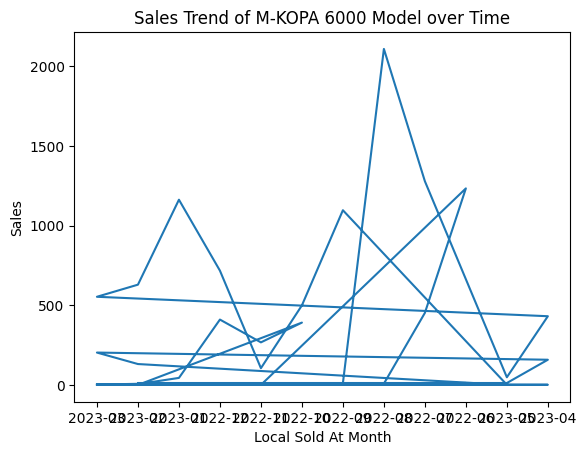

In [32]:
# Filtering DataFrame for the M-KOPA 6000 selected model
selected_model = sales_data_final[sales_data_final['Model'] == 'M-KOPA 6000']

# Create a line plot for sales over time
plt.plot(selected_model['Local Sold At Month'], selected_model['Sales'])
plt.xlabel('Local Sold At Month')
plt.ylabel('Sales')
plt.title('Sales Trend of M-KOPA 6000 Model over Time')
plt.show()

<b>A chart that shows the monthly revenue trend of a selected Masterbrand.</b>

In [35]:
#Converting Local Sold At Month column to datetime
sales_data_final['Local Sold At Month'] = pd.to_datetime(sales_data_final['Local Sold At Month'])
# Extracting the Month from the Local Sold At Month column 
sales_data_final['Month'] = sales_data_final['Local Sold At Month'].dt.strftime('%b')

In [40]:
# Filter the DataFrame for the selected masterbrand
solar_masterbrand = sales_data_final[sales_data_final['Masterbrand'] == 'Solar']

# Group the data by month and calculate the sum of revenue
monthly_revenue = solar_masterbrand.groupby('Month')['Revenue'].sum().sort_values(ascending = False)
monthly_revenue

Month
Aug    415765.0
Dec    376055.0
Jul    347285.0
Sep    269131.0
Oct    251245.0
Mar    227400.0
Jun    223971.0
Nov    220803.0
Jan    203415.0
Apr    192355.0
Feb    147160.0
May     25245.0
Name: Revenue, dtype: float64

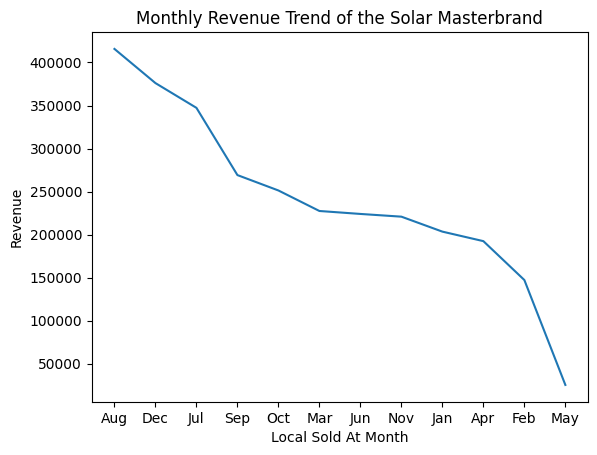

In [41]:
# Create a line plot for monthly revenue
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Local Sold At Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trend of the Solar Masterbrand')
plt.show()

<b>A chart that shows the total revenue generated by each Product Sub Category</b>

In [44]:
# Grouping by Product Sub Category and calculate the sum of revenue
sub_category_revenue = sales_data_final.groupby('Product Sub Category')['Revenue'].sum().sort_values(ascending = False)
sub_category_revenue

Product Sub Category
M-KOPA 6000         1596175.0
M-KOPA 600           800060.0
M-KOPA +6000         223350.0
M-KOPA +600          189330.0
M-KOPA 6              70073.0
M-KOPA 60000          18250.0
M-KOPA 6000 Grid       2450.0
M-KOPA 600 Zuku         140.0
M-KOPA +500               2.0
Name: Revenue, dtype: float64

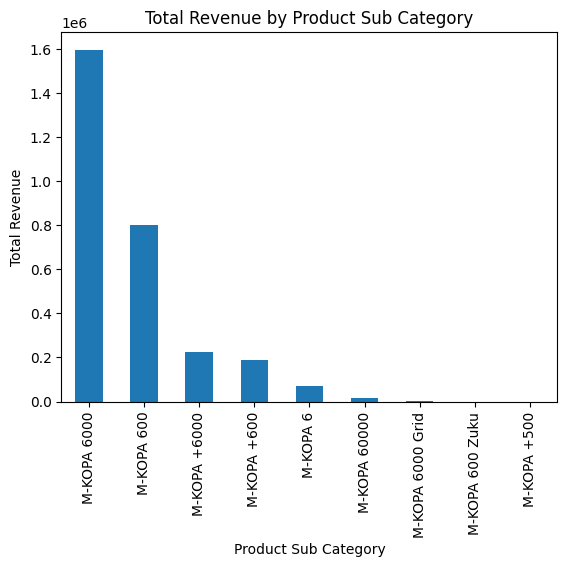

In [45]:
# Create a bar plot for total revenue by sub category
sub_category_revenue.plot(kind='bar')
plt.xlabel('Product Sub Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Sub Category')
plt.show()

<b>A chart that shows the daily top-up trend of each Product Type.</b>

In [48]:
# Grouping the data by Product Type and calculating the sum of daily top-up
product_type_topup = sales_data_final.groupby('Product Type')['Daily Top Up'].sum()
product_type_topup

Product Type
Grid TV      1010.0
Lights        851.0
Solar TV    15122.0
Name: Daily Top Up, dtype: float64

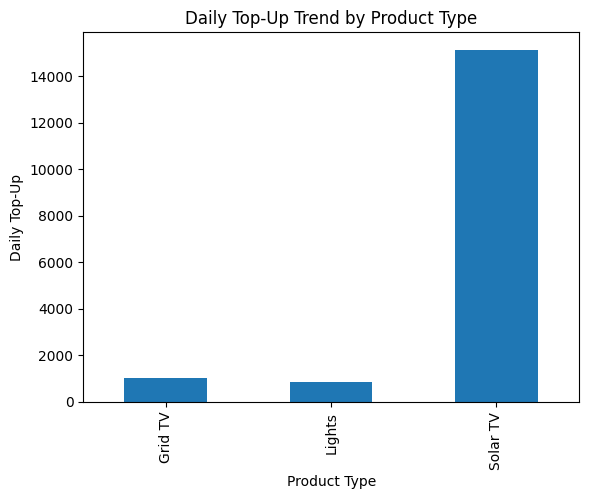

In [49]:
# Create a bar plot for daily top-up by product type
product_type_topup.plot(kind='bar')
plt.xlabel('Product Type')
plt.ylabel('Daily Top-Up')
plt.title('Daily Top-Up Trend by Product Type')
plt.show()

<b> A table that shows the Payment Plan with the highest sales in a particular month.</b>

In [50]:
sales_data_final['Month'].value_counts()

Month
Jul    17
Aug    16
Nov    16
Sep    15
Dec    14
Oct    14
Jun    13
Feb    12
Mar    11
Jan    11
Apr     8
May     7
Name: count, dtype: int64

In [52]:
# Filter DataFrame for the July month
july = sales_data_final[sales_data_final['Month'] == 'Jul']

# Find the payment plan with the highest sales
highest_sales_payment_plan = july.groupby('Payment Plan Name')['Sales'].sum().sort_values(ascending = False)
highest_sales_payment_plan

Payment Plan Name
MK 6000 32" TV v21                        1279
MK 6000 32" TV v20                         453
MK 6 v10                                   395
MK 600 24" TV v17                          369
MK +6000 32" TV v22                        217
MK 600 24" TV  v16                         173
MK 6 v9                                    143
MK +600 24" TV v18                          55
M-KOPA 600 (24") v2                         36
MK 60K (80W Panel) 32"TV & Fridge v4        18
MK 6000 32" TV v2 Staff                     11
MK 6000 32" TV v18 LD                        9
MK 6000 (32"Backup TV) v8                    6
MK 60K (2*80W Panel) 32"TV & Fridge v2       4
MK 600 24" TV v2 Staff                       2
MK 600 24" TV v10 LD                         1
MK 60K (160W Panel) 32"TV & Fridge v3        1
Name: Sales, dtype: int64

In [53]:
#Exporting to excel file
sales_data_final.to_excel('Clean Sales Data.xlsx', index=False)